# Power Calculations


Parts:
1. Key Inputs
2. Power Calculation
3. One Sample vs Constance/Known Value
4. Two Independent Samples (A/B Test)
5. Multiple Comparisons Adjustments


## Background

We all know about type I error, the false positive rate (FPR). The probability of rejecting the null hypothesis `H_{0}` when it is actually true. It’s useful to determine sample size required to receive a desired level of statistical precision for you experiment. To do this, an analyst will input their beliefs on what the data may look like, and any adjustments for multiple comparisons into a power calculator. 

The power calculator will return the number of samples required to achieve a level of statistical significance (e.g. p=0.05) with a certain statistical power (e.g. 80%). Consider the situation below

## Example: Testing User Engagement - One Sample Z Test

We own a user platform where user engagement is very important. A designer proposes a new user experience (B) and wants to challenge our current experience (A). We decide to run an A/B test measuring duration of time spent the platform. Here is our hypothesis:

$$
H_{0}: \mu_{A} = 5\ minutes\\
H_{A}: \mu_{A} < 5\ minutes
$$

We plan to analyze this with a one sample z test.

In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.weightstats import ztest

In [15]:
print('sdfsdfsdfsdfsd')

sdfsdfsdfsdfsd


# How to choose sample size

When designing the test we are trying to maximize test power and minimize Type I and II error. We want to choose a sample size that balances error tolerance with cost. Inputs into the sample size calculation: effect size, standard deviation, power, significance

## Inputs

#### Effect Size / Substantive Hypothesis $H_{s}$

Sample size calculations are conditional us evaluating the power of a hypothetical effect size (
$H_{s}$). This can be challenging to set prior to running the test.  There are a number of strategies for setting the effect size:

1. You can choose the minimum effect size that is meaningful for you. For example you may only launch out a new marketing strategy if it increases conversion by 2%. Therefore you want to read an effect size of at least 2%
2. Use prior studies or observational data
3. Choose the smallest effect size your budget will allow you to read.

**As shown below, small effects sizes are harder to read and require more sample**

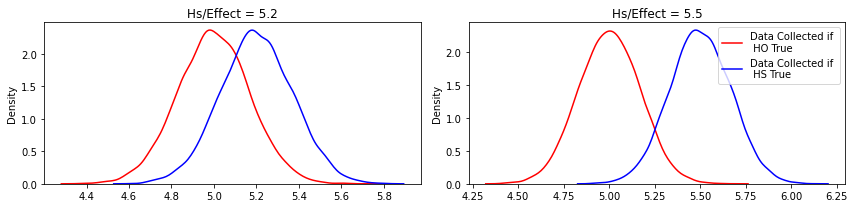

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(12,3))
stderr=2/np.sqrt(140)
sns.kdeplot(stats.norm(5, stderr).rvs(10000), 
            color="red", label='Data Collected if \n HO True', ax=axes[0])
sns.kdeplot(stats.norm(5.2, stderr).rvs(10000), 
            color="blue",  label='Data Collected if \n HS True', ax=axes[0])
axes[0].set_title('Hs/Effect = 5.2')

sns.kdeplot(stats.norm(5, stderr).rvs(10000), 
            color="red", label='Data Collected if \n HO True', ax=axes[1])
sns.kdeplot(stats.norm(5.5, stderr).rvs(10000), 
            color="blue",  label='Data Collected if \n HS True', ax=axes[1])
axes[1].set_title('Hs/Effect = 5.5')

plt.tight_layout()
plt.legend()

In [5]:
from IPython.core.display import HTML
HTML('<!--more-->')

#### Sample Size

A good way to develop intuition on inputs is reverse the calculator and see what level of significance or power you can get by choosing a sample size at the top your budget. From here you can modify your inputs until you arrive at a more reasonable calculation.

**As shown below, more sample narrows the variance and reduces required sample size**

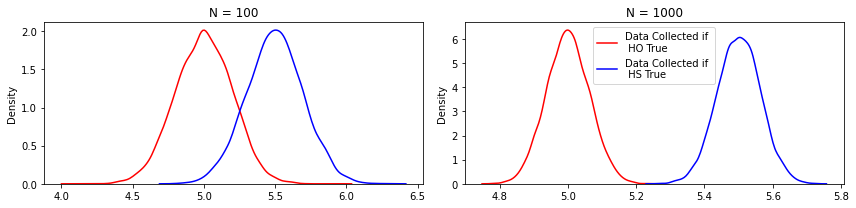

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(12,3))

n=100 # sample size
sns.kdeplot(stats.norm(5, 2/np.sqrt(n)).rvs(10000), 
            color="red", label='Data Collected if \n HO True', ax=axes[0])
sns.kdeplot(stats.norm(5.5, 2/np.sqrt(n)).rvs(10000), 
            color="blue",  label='Data Collected if \n HS True', ax=axes[0])
axes[0].set_title('N = 100')

n=1000 # sample size
sns.kdeplot(stats.norm(5, 2/np.sqrt(n)).rvs(10000), 
            color="red", label='Data Collected if \n HO True', ax=axes[1])
sns.kdeplot(stats.norm(5.5, 2/np.sqrt(n)).rvs(10000), 
            color="blue",  label='Data Collected if \n HS True', ax=axes[1])
axes[1].set_title('N = 1000')

plt.tight_layout()
plt.legend()

#### Statistical Significance

Analysts usually start with significant level of p=.05. Meaning they are only willing to reject H0 if there is 95% chance of being right. p=0.05 may be excessively constraining for most business use cases. 80% confidence (p=0.2) can also be a reasonable choice.

$$
Statistical\ Signifiance = P(Type\ I\ Error)
$$

#### Statistical Power

Statistical power is the probability of rejecting $H_{0}$ if $H_{s}$ (assumed effect size) is true. This translates to the size of the effect you can read. A higher powered test means more samples, more sample means less standard error, less error means you can read smaller differences in effect size. 

$$
Power = 1 - P(Type\ II\ Error)
$$

## Calculating sample size for a one sample z test


In [7]:
# Population characteristics
pop_std = 2
H_0 = 5

In [8]:
# Test Inputs
effect = 5.5 # minimum effect size we want to be able to read
alpha = .2 # significance level (Type I Error Rate)
n = 140 # sample size

stderr = pop_std/np.sqrt(n)
zscore = stats.norm(0, 1).ppf(1-alpha)

### Calculating Power

Probability of a type II error: Accepting $H_{0}$ when $H_{a}$ is True

$Power = 1 - \phi (z)$

$z = H_{a} - (H_{0} + \sigma_{\mu} \times z_{s})$

where $\phi$ is the CDF of the standard normal distribution and $z_{s}$ is the zscore of the significance level


In [9]:
power =  stats.norm(0, 1).cdf((effect - (H_0+stderr*zscore))/stderr)

print('Type I Error: {}'.format(alpha))
print('Type II Error: {:.2f}'.format(1 - power))
print('Test Power: {:.2f}'.format(power))

Type I Error: 0.2
Type II Error: 0.02
Test Power: 0.98


### Visualizing Type I and Type II error

To visualize the outcome of the test we can view the sample distributions from both Hypothesis (red and blue). Drawing the line of signficance (e.g. at p=0.05) shows us the decision boundary. We will reject $H_{0}$ if we collect a sample mean greater than this line. 

If $H_0$ is true then a rejection, the red shaded region, is the probability of Type I error. If $H_{s}$ is true than the rejection region, shaded blue, is correct refers to the power of the test (1 - Type II).

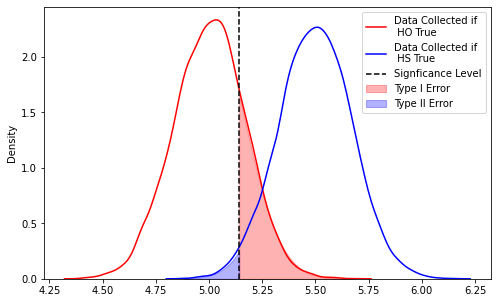

In [10]:
plt.figure(figsize=(8,5))

# plotting function
As = stats.norm(H_0, stderr).rvs(10000)
Bs = stats.norm(effect, stderr).rvs(10000)

# Shading of Type I error (alpha)
alpha_xs = np.linspace(H_0 + stderr*zscore, np.max(As), 100)
alpha_ymax = stats.norm(H_0, stderr).pdf(alpha_xs)
alpha_ymin = np.zeros(alpha_xs.shape[0])

# Shading of Type II error (1 - Beta)
Beta_xs = np.linspace(H_0 + stderr*zscore, np.min(Bs), 100)
Beta_ymax = stats.norm(effect, stderr).pdf(Beta_xs)
Beta_ymin = np.zeros(Beta_xs.shape[0])

sns.kdeplot(As, color="red", shade=False, label='Data Collected if \n HO True')
plt.fill_between(alpha_xs, alpha_ymin, alpha_ymax, alpha=.3, color='red', label='Type I Error')
sns.kdeplot(Bs, color="blue", shade=False, label='Data Collected if \n HS True')
plt.fill_between(Beta_xs, Beta_ymin, Beta_ymax, alpha=.3, color='blue', label='Type II Error')

plt.axvline(H_0 + zscore*stderr,  color='black', linestyle='--', label='Signficance Level')
plt.legend()

### Simulations 

To confirm our estimates we can simulate running 1,000 z tests. 

1. Sample from the population assuming `H_{0}` to be true
2. Sample from the population assuming `H_{s}` to be true
3. Perform a one same z test
4. Calculate the number of times we reject the `H_{0}`

The number of reject under `H_{0}` should align to the significance level. The number of rejects under `H_{a}` aligns to the test power


In [11]:
rejects_Hs = []
rejects_H0 = []

for i in range(5000):
    Hs_samples = stats.norm(effect, pop_std).rvs(n) # Sample from the substantive hypothesis
    H0_samples = stats.norm(H_0, pop_std).rvs(n) # Sample from the null hypothesis
    
    # test
    res_Hs = ztest(Hs_samples, value=5, alternative='larger')
    res_H0 = ztest(H0_samples, value=5, alternative='larger')
    
    # decision
    rejects_Hs.append(res_Hs[1]<alpha)
    rejects_H0.append(res_H0[1]<alpha)

print('Test Power: {:.2f}'.format(np.mean(rejects_Hs)))
print('Type I Error: {:.2f}'.format(np.mean(rejects_H0), 3))
print('Type II Error: {:.2f}'.format(1 - np.mean(rejects_Hs)))

Test Power: 0.98
Type I Error: 0.21
Type II Error: 0.02


## Example: Two Sample Z Test

Consider now that we are testing two web experinces, A and B, and we want to see which one causes users to spend more time on the website. We are now conducting a two sample z test:

$$
H_{0}: \mu_{a} = \mu_{b}\\
H_{a}: \mu_{a} \neq \mu_{b}
$$

There are two differences: (1)the effect size is the difference between A and B, and (2) standard error is calculated as:

$$
\sigma_{\mu} = \sigma \times \sqrt{1/n_{a} + 1/n_{b}}
$$

In [12]:
# Population characteristics
pop_std = 2
H_0 = 0

# Test Inputs
effect = .2 # minimum difference we want to be able to read
alpha = .05 # significance level (Type I Error Rate)
n1 = 140 # sampel size for A
n2 = 140 # sample size for B

stderr = pop_std*np.sqrt(1/n+1/n) 
zscore = stats.norm(0, 1).ppf(1-alpha)

In [13]:
power =  stats.norm(0, 1).cdf((effect - (H_0+stderr*zscore))/stderr)

print('Type I Error: {}'.format(alpha))
print('Type II Error: {:.2f}'.format(1 - power))
print('Test Power: {:.2f}'.format(power))

Type I Error: 0.05
Type II Error: 0.79
Test Power: 0.21
